# Data Visualization Tutorial 3

## Load and Setup the Data

In [1]:
# import required library functions
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
df_canada = pd.read_excel('data/canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)

# conversion index and columns to lists
df_canada.columns.tolist()
df_canada.index.tolist()

# remove unnecessary columns
# in pandas axis=0 re|presents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# convert all column names to strings
df_canada.columns = list(map(str, df_canada.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
df_canada['Total'] = df_canada.sum(axis=1)

# index data by country
df_canada.set_index('Country', inplace=True)

## Visualize Correlation (2 variables)

### Visualize total immigration into Canada from 1980 to 2013

In [3]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


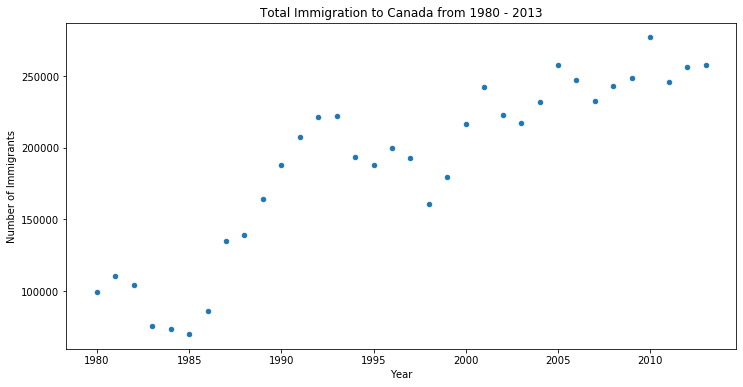

In [4]:
# plot the data points
df_total.plot(kind='scatter',
              x='year',
              y='total',
              figsize=(12, 6)
             )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Compute and Visualize Regression Line

In [5]:
# compute line fit y = ax + b
x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

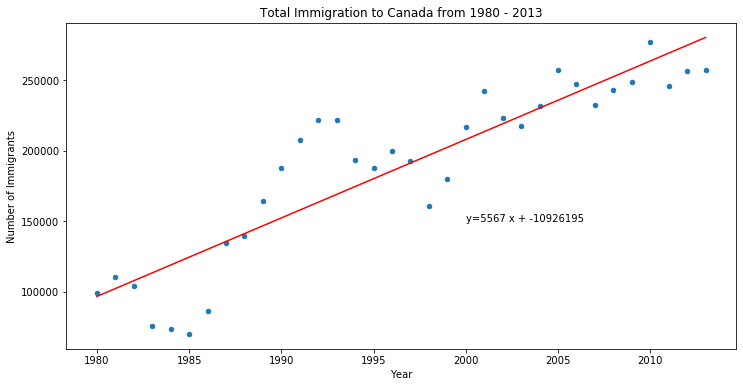

In [6]:
# plot the data points
df_total.plot(kind='scatter',
              x='year',
              y='total',
              figsize=(12, 6)
             )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

## Visualize Regression with Seaborn

In [7]:
# import library
import seaborn as sns

In [8]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_total.index = map(float, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


### Plot regression line

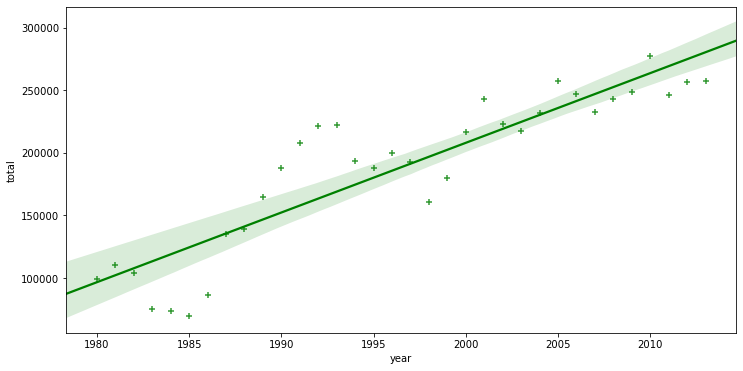

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

### Plot LOESS curve

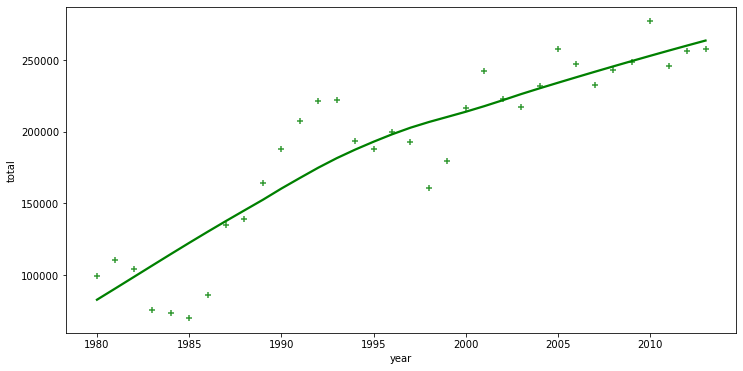

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.regplot(x='year', y='total', data=df_total, lowess=True, color='green', marker='+')

## Visualize Correlation (3 variables)

### Arrange coutry wise yearly data

In [11]:
# transposed dataframe 
df_can_t = df_canada[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


### Compute normalized immigration data

In [12]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

print(norm_china)

0     0.087586
1     0.125557
2     0.043379
3     0.008184
4     0.000000
5     0.007039
6     0.010546
7     0.027182
8     0.029983
9     0.068100
10    0.159510
11    0.310008
12    0.226977
13    0.201914
14    0.282558
15    0.313491
16    0.435687
17    0.461505
18    0.475485
19    0.695180
20    0.828166
21    0.850208
22    0.741262
23    0.850330
24    0.854714
25    1.000000
26    0.779185
27    0.636067
28    0.694400
29    0.684293
30    0.703023
31    0.657013
32    0.767153
33    0.794067
Name: China, dtype: float64


### Visualize using Bubble Plot

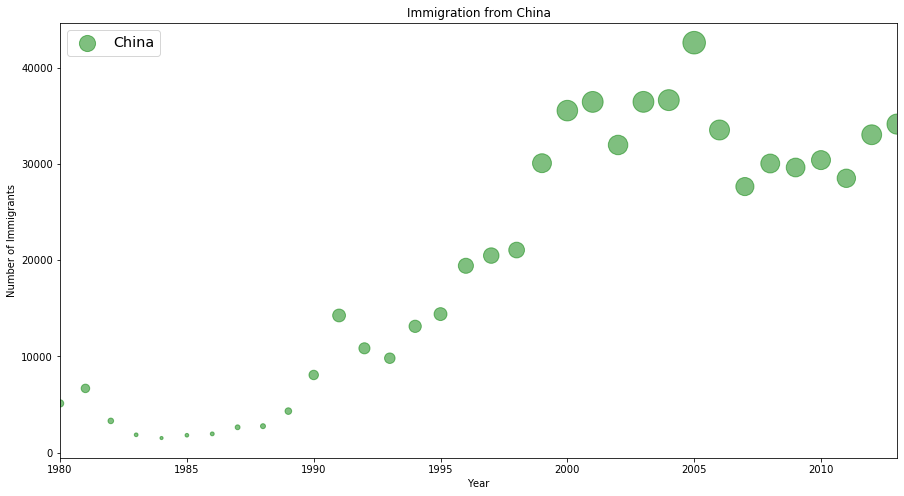

In [13]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(15, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 500 + 10,  # pass in weights as size
                    xlim=(1980, 2013)
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China')
ax0.legend(['China'], loc='upper left', fontsize='x-large')